## Project Overwiev of the data: measuremnts 

#### Second Try with netCDF4: bouy 6 is closer to the field of interest! So we start with this met mast. 

In [27]:
#Import all needed libraries: 
import os
import numpy as np
import pandas as pd
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
#Open the nc.file
file_path = "../measurements/2023-11-06_Buoy6_BSH_N-9.nc"
ncfile = Dataset(file_path)

In [4]:
# Print all the head groups first with enumeration
for group_count, group_name in enumerate(ncfile.groups):
    group = ncfile.groups[group_name]
    print(f"Group Nr. {group_count + 1}: {group_name}")


Group Nr. 1: ZX_LIDAR_WLBZ_6
Group Nr. 2: METEO_WLBZ_6
Group Nr. 3: ADD_DATA_WLBZ_6
Group Nr. 4: ZX_LIDAR_WLBZ_2_MCP
Group Nr. 5: METEO_WLBZ_2_MCP


In [16]:
# Iterate over all the groups
for group_name in ncfile.groups:
    group = ncfile.groups[group_name]
    print(f"Group: {group_name}")

    # Iterate over all variables of the group 
    for variable_group in group.variables:
        group_variable = group.variables[variable_group]
        print(f"    Groupvariable: {variable_group}")
    
    # Iterate over all the subgroups
    for subgroup_name in group.groups:
        subgroup = group.groups[subgroup_name]
        print(f"        Subgroup: {subgroup_name}")
        
        # Iterate over all the variables in the subgroup
        for variable_name in subgroup.variables:
            variable = subgroup.variables[variable_name]
            print(f"            SubGroupVariable: {variable_name}")



Group: ZX_LIDAR_WLBZ_6
    Groupvariable: wind_speed
    Groupvariable: wind_from_direction
    Groupvariable: wind_from_direction_availability
    Groupvariable: wind_speed_availability
    Groupvariable: wind_speed_min
    Groupvariable: wind_speed_max
    Groupvariable: wind_speed_stddev
    Groupvariable: wind_count
    Groupvariable: turbulence_intensity
    Groupvariable: algorithm_bitmask
Group: METEO_WLBZ_6
        Subgroup: Vaisala Weather Station
            SubGroupVariable: rain_accumulation
            SubGroupVariable: rain_duration
            SubGroupVariable: rain_intensity
            SubGroupVariable: hail_accumulation
            SubGroupVariable: hail_duration
            SubGroupVariable: hail_intensity
            SubGroupVariable: precipitation_count
            SubGroupVariable: air_temperature
            SubGroupVariable: relative_humidity
            SubGroupVariable: air_pressure
            SubGroupVariable: air_density
            SubGroupVariable: air_de

In [17]:
# Iterate over the variables in the ZX_LIDAR_WLBZ_6 group 

for variable_name in ncfile.groups['ZX_LIDAR_WLBZ_6'].variables:
    variable = ncfile.groups['ZX_LIDAR_WLBZ_6'].variables[variable_name]
    print(f"Variable Name: {variable_name}")
    print(f"Variable Attributes:")
    print(f"    Units: {variable.units}")
    print(f"    Long Name: {variable.long_name}")
    print(f"    Shape: {variable.shape}")
    print(f"---------------------------------------------------------")


Variable Name: wind_speed
Variable Attributes:
    Units: m/s
    Long Name: Wind speed
    Shape: (57196, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_from_direction
Variable Attributes:
    Units: degree
    Long Name: Horizontal wind direction
    Shape: (57196, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_from_direction_availability
Variable Attributes:
    Units: percent
    Long Name: Availability of the horizontal wind direction
    Shape: (57196, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_speed_availability
Variable Attributes:
    Units: percent
    Long Name: Availability of the horizontal wind speed
    Shape: (57196, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_speed_min
Variable Attributes:
    Units: m/s
    Long Name: Minimum wind speed
    Shape: (57196, 1, 1, 6)
----------------------------------------

In [18]:
# Iterate over the subgroups in the METEO_WLBZ_6 group
meteo_group = ncfile.groups['METEO_WLBZ_6']

for subgroup_name in meteo_group.groups:
    subgroup = meteo_group.groups[subgroup_name]
    print(f"SUBGROUP: {subgroup_name}")
    
    # Iterate over the variables in the subgroup and print their attributes
    for variable_name in subgroup.variables:
        variable = subgroup.variables[variable_name]
        print(f"Variable Name: {variable_name}")
        print(f"Variable Attributes:")
        print(f"    Units: {variable.units}")
        print(f"    Long Name: {variable.long_name}")
        print(f"    Shape: {variable.shape}")
        print(f"---------------------------------------------------------")


SUBGROUP: Vaisala Weather Station
Variable Name: rain_accumulation
Variable Attributes:
    Units: mm
    Long Name: Rain accumulation measured by the Vaisala Weather Station at 3 m above MSL
    Shape: (57196, 1, 1)
---------------------------------------------------------
Variable Name: rain_duration
Variable Attributes:
    Units: s
    Long Name: Rain duration measured by the Vaisala Weather Station at 3 m above MSL
    Shape: (57196, 1, 1)
---------------------------------------------------------
Variable Name: rain_intensity
Variable Attributes:
    Units: mm/h
    Long Name: Rain intensity measured by the Vaisala Weather Station at 3 m above MSL
    Shape: (57196, 1, 1)
---------------------------------------------------------
Variable Name: hail_accumulation
Variable Attributes:
    Units: hits/m^2
    Long Name: Hail accumulation measured by the Vaisala Weather Station in 3 m above MSL
    Shape: (57196, 1, 1)
---------------------------------------------------------
Variable 

In [20]:
# Define the time variable
time_var = ncfile.variables['time']

# Convert the time variable to a human-readable format
time = nc.num2date(time_var[:], time_var.units)

# Specify the group
group_name = 'ZX_LIDAR_WLBZ_6'
group = ncfile.groups[group_name]

# Extract variables
wind_speed = group.variables['wind_speed'][:]
wind_from_direction = group.variables['wind_from_direction'][:]
wind_from_direction_availability = group.variables['wind_from_direction_availability'][:]
turbulence_intensity = group.variables['turbulence_intensity'][:]

# Create DataFrames for each height
height_indices = range(wind_speed.shape[3])  # height is the 4th dimension
dataframes = {}

for height_idx in height_indices:
    df = pd.DataFrame({
        'time': time,
        'wind_speed': wind_speed[:, 0, 0, height_idx],
        'wind_from_direction': wind_from_direction[:, 0, 0, height_idx],
        'wind_from_direction_availability': wind_from_direction_availability[:, 0, 0, height_idx],
        'turbulence_intensity': turbulence_intensity[:, 0, 0, height_idx]
    })
    
    # Set time as the index
    df.set_index('time', inplace=True)
    
    # Store the DataFrame in the dictionary
    dataframes[f'height_{height_idx}'] = df

# Heights in meters for each DataFrame
heights = [14, 42, 94, 140, 200, 250]

# Assign DataFrames to variables dynamically
for idx, height in enumerate(heights):
    globals()[f'height_{height}'] = dataframes[f'height_{idx}']

height_140

,wind_speed,wind_from_direction,wind_from_direction_availability,turbulence_intensity
time,,,,
2022-03-03 00:00:00,8.34,104.39,91.7,4.3137
2022-03-03 00:10:00,7.89,104.47,88.3,6.6214
2022-03-03 00:20:00,7.70,107.12,85.2,3.6374
2022-03-03 00:30:00,7.05,112.57,93.7,5.0032
2022-03-03 00:40:00,7.20,113.91,98.4,3.9195
...,...,...,...,...
2023-04-04 03:50:00,3.50,150.44,96.7,6.8600
2023-04-04 04:00:00,3.12,152.65,100.0,7.8465
2023-04-04 04:10:00,3.04,146.66,98.4,7.3086


In [22]:
# Dictionary to store filtered DataFrames and statistics
filtered_dataframes = {}
nan_stats = {}

# Filter NaN values and calculate statistics
for idx, height in enumerate(heights):
    height_key = f'height_{height}'
    df = dataframes[f'height_{idx}']
    
    original_length = len(df)
    filtered_df = df.dropna()
    filtered_length = len(filtered_df)
    
    nan_count = original_length - filtered_length
    nan_percentage = (nan_count / original_length) * 100
    
    # Store the filtered DataFrame
    filtered_dataframes[height_key] = filtered_df
    
    # Store the statistics
    nan_stats[height_key] = {
        'filtered_nan_count': nan_count,
        'filtered_nan_percentage': nan_percentage
    }
# Assign filtered DataFrames to variables 
for height in heights:
    globals()[f'filter_height{height}'] = filtered_dataframes[f'height_{height}']

# Print NaN statistics for all heights
print("\nNaN Statistics for all heights:")
for height, stats in nan_stats.items():
    print(f"Height {height}: {stats['filtered_nan_count']} NaN values filtered ({stats['filtered_nan_percentage']:.2f}%)")


NaN Statistics for all heights:
Height height_14: 873 NaN values filtered (1.53%)
Height height_42: 1332 NaN values filtered (2.33%)
Height height_94: 2518 NaN values filtered (4.40%)
Height height_140: 3045 NaN values filtered (5.32%)
Height height_200: 3383 NaN values filtered (5.91%)
Height height_250: 3604 NaN values filtered (6.30%)


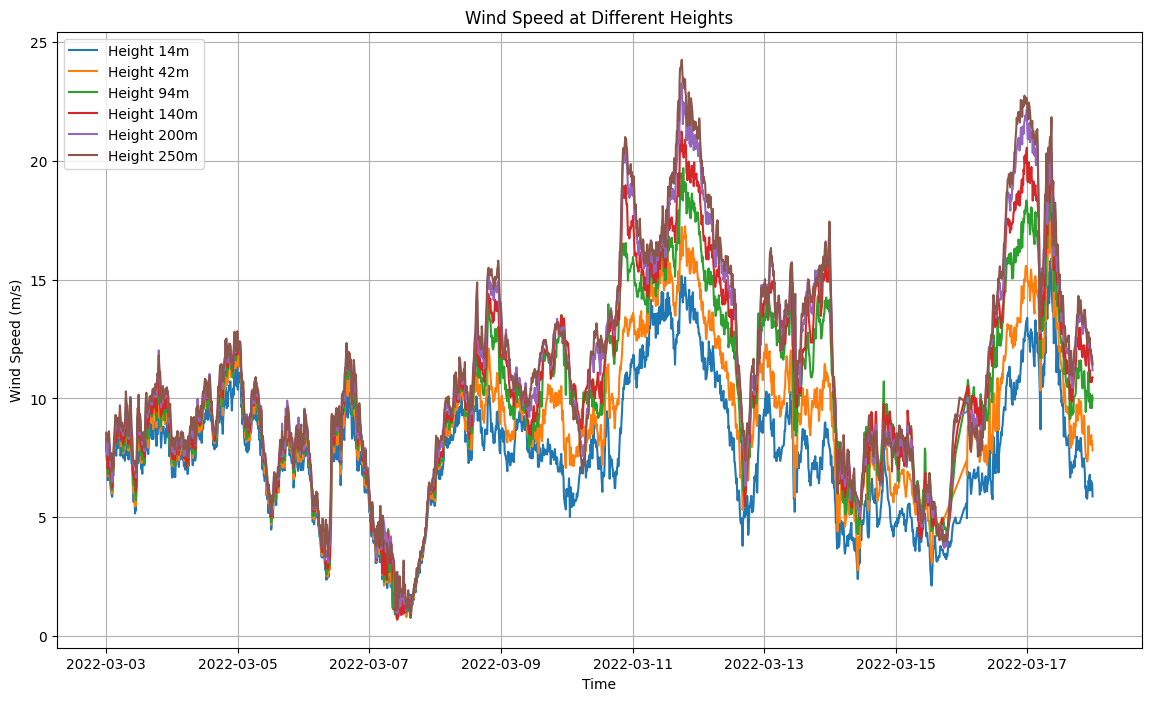

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the index is converted to datetime for all heights
for height in heights:
    df = globals()[f'filter_height{height}']
    df.index = pd.to_datetime([pd.Timestamp(t.isoformat()) for t in df.index])

# Define the date range
start_date = '2022-03-03'
end_date = '2022-03-17'

# Plot wind speed for all heights in one plot, within the specified date range
plt.figure(figsize=(14, 8))

for height in heights:
    df = globals()[f'filter_height{height}']
    df_time_selected = df.loc[start_date:end_date]
    plt.plot(df_time_selected.index, df_time_selected['wind_speed'], label=f'Height {height}m')

plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed at Different Heights')
plt.legend()
plt.grid(True)
plt.show()


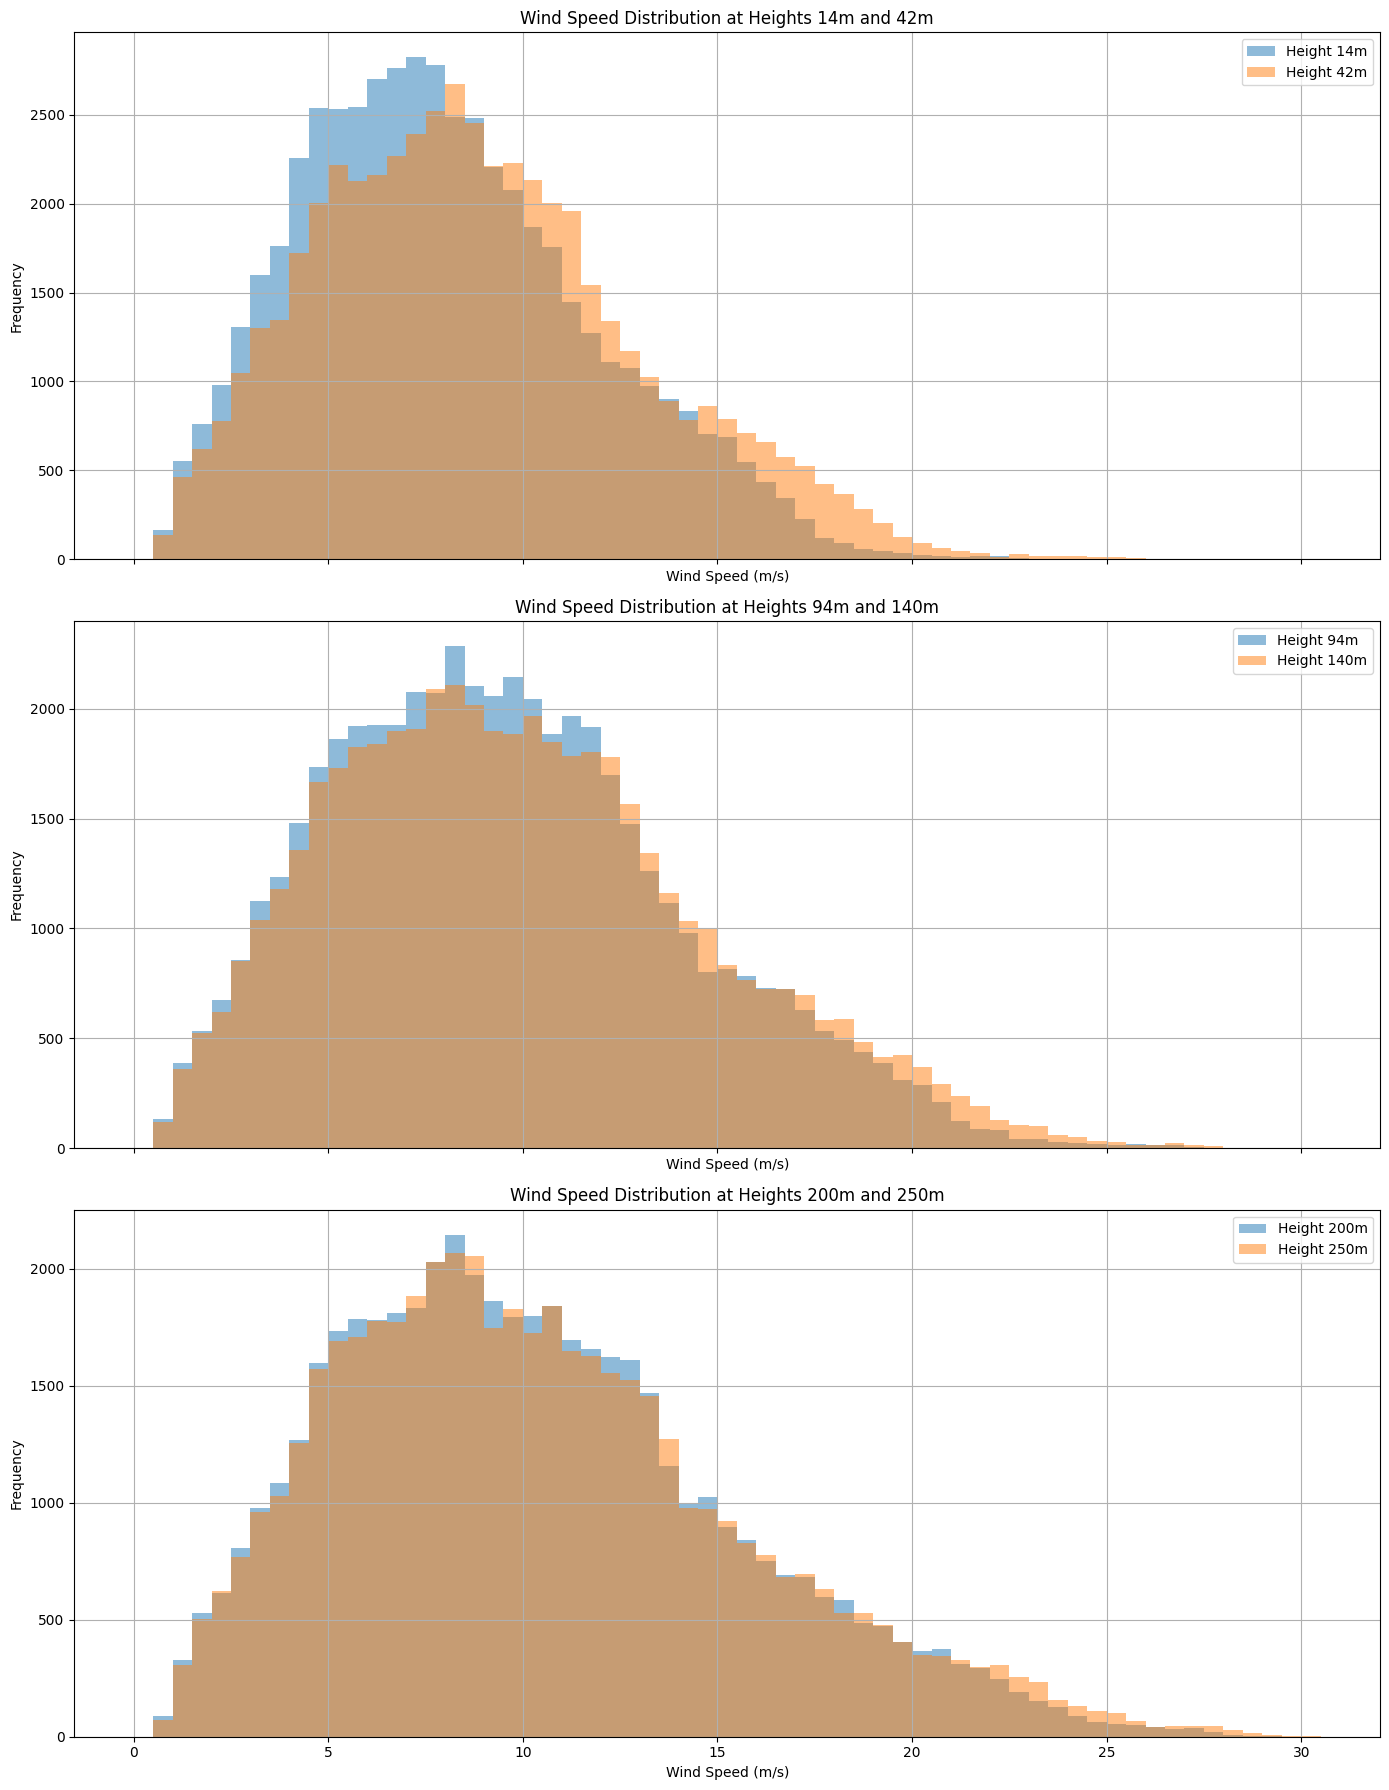

In [28]:
# Define the date range
start_date = '2022-03-03'
end_date = '2023-03-03'

# Filter DataFrames for the specified date range
dfs_filtered = {}
for height in heights:
    df = globals()[f'filter_height{height}']
    dfs_filtered[height] = df.loc[start_date:end_date]

# Create bins with 0.5 m/s bin width
bin_width = 0.5
max_wind_speed = max([df['wind_speed'].max() for df in dfs_filtered.values()])
bins = np.arange(0, max_wind_speed + bin_width, bin_width)

height_pairs = [(14, 42), (94, 140), (200, 250)]

# Plot histograms for wind speed at the defined height pairs in subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18), sharex=True)

for ax, (height1, height2) in zip(axes, height_pairs):
    df_filtered1 = dfs_filtered[height1]
    df_filtered2 = dfs_filtered[height2]
    
    ax.hist(df_filtered1['wind_speed'], bins=bins, alpha=0.5, label=f'Height {height1}m')
    ax.hist(df_filtered2['wind_speed'], bins=bins, alpha=0.5, label=f'Height {height2}m')
    
    ax.set_xlabel('Wind Speed (m/s)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Wind Speed Distribution at Heights {height1}m and {height2}m')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


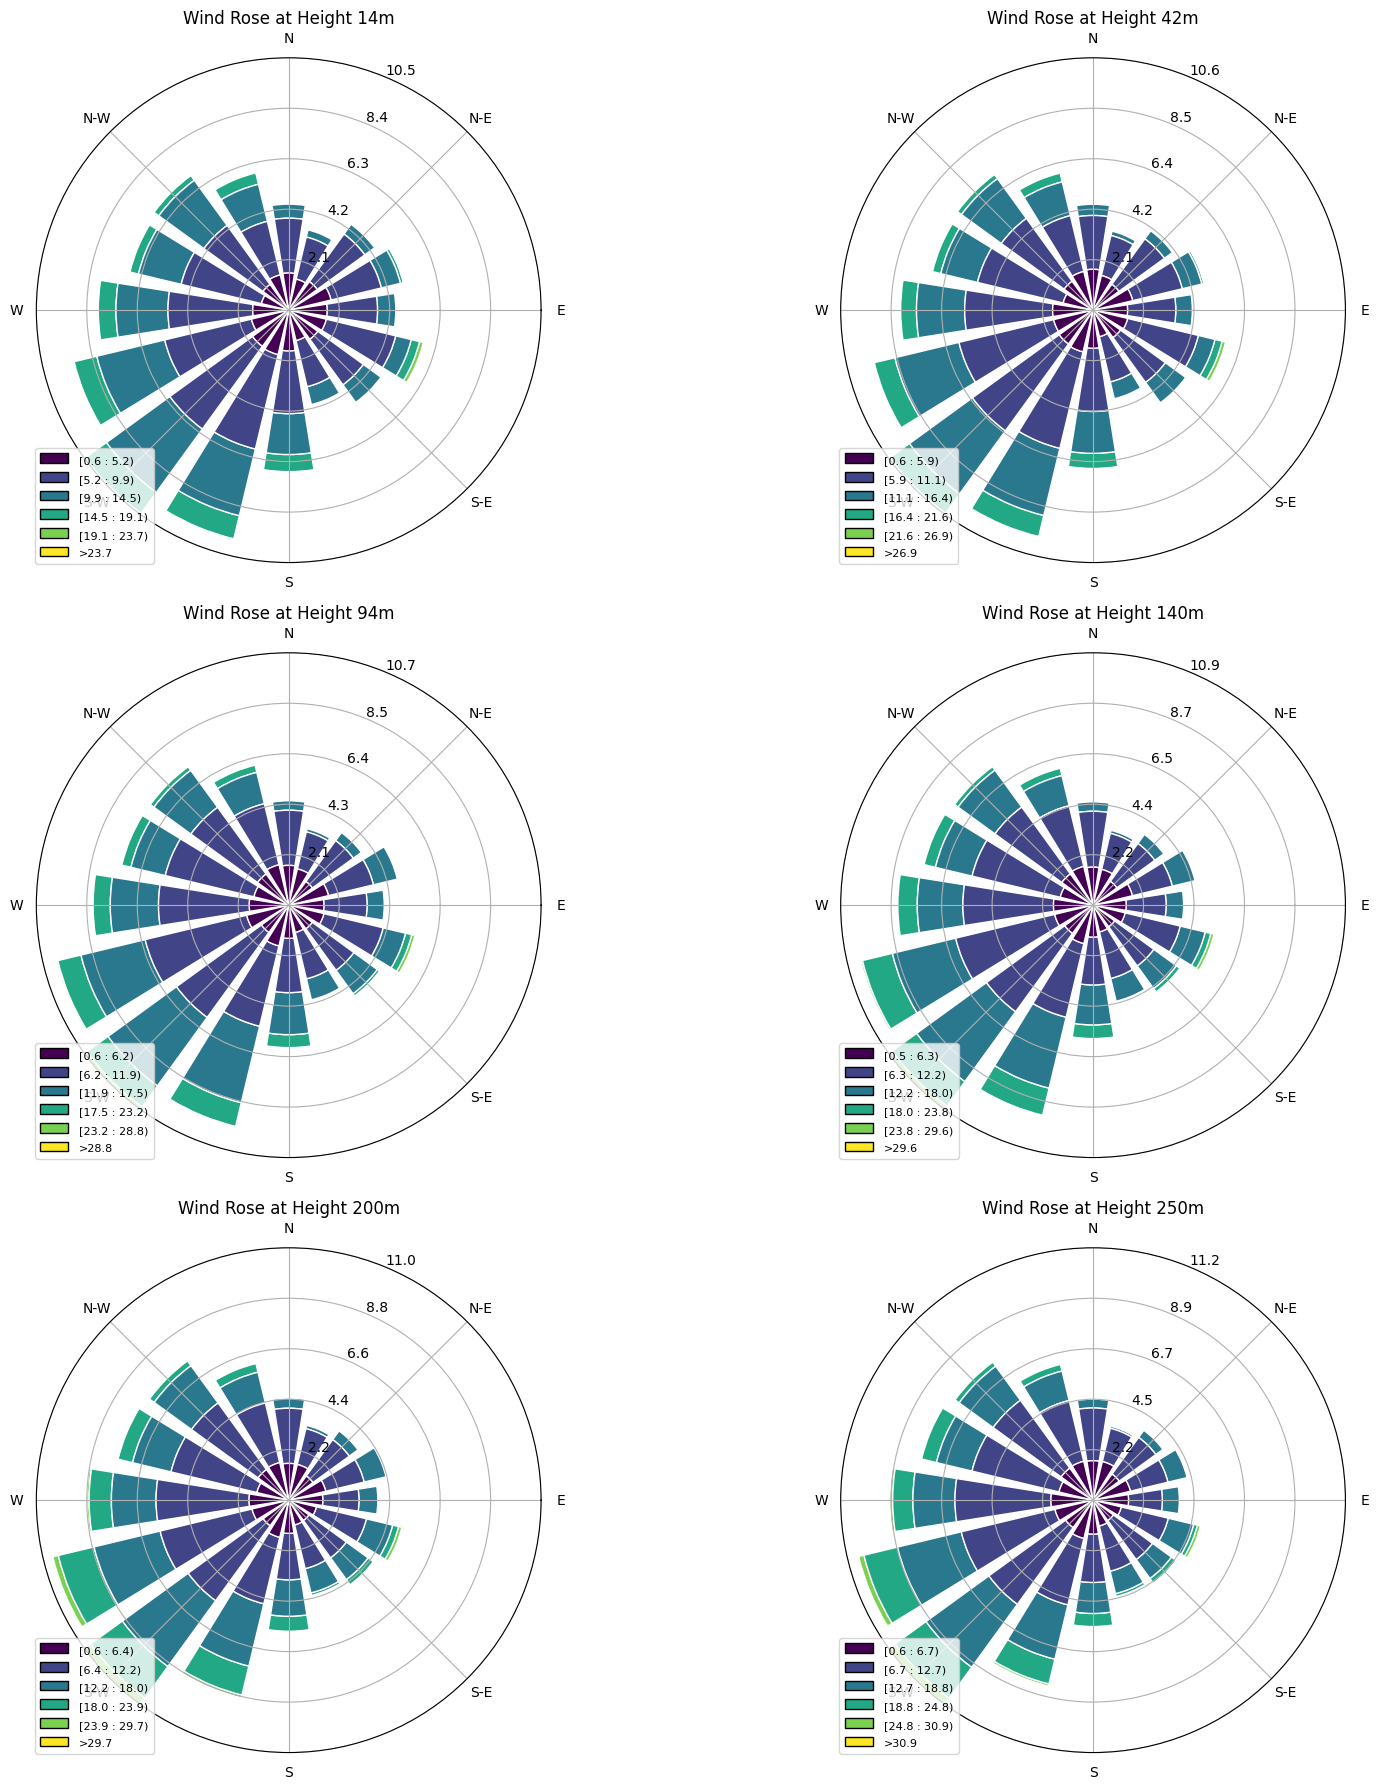

In [35]:
from windrose import WindroseAxes

# Function to plot wind rose
def plot_wind_rose(ax, df, height):
    ax.bar(df['wind_from_direction'], df['wind_speed'], normed=True, opening=0.8, edgecolor='white')
    ax.set_title(f'Wind Rose at Height {height}m')
    ax.set_legend()

# Create subplots for wind roses
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18), subplot_kw=dict(projection='windrose'))

# Plot wind roses for the defined heights
for ax, height in zip(axes.flatten(), heights):
    df = globals()[f'filter_height{height}']
    plot_wind_rose(ax, df, height)

plt.tight_layout()
plt.show()


#### Meteorological Data: Second Group: METEO_WLBZ_6

In [36]:
# Specify the main group
meteo_group = ncfile.groups['METEO_WLBZ_6']

# Extract time variable from the main group
try:
    time_var = nc.num2date(meteo_group.variables['time'][:], meteo_group.variables['time'].units)
except KeyError:
    time_var = None

# Function to convert NetCDF subgroup to DataFrame
def nc_subgroup_to_df(subgroup, time_var=None):
    data_dict = {}
    if time_var is not None:
        data_dict['time'] = time_var
    
    for variable_name in subgroup.variables:
        variable = subgroup.variables[variable_name]
        data_dict[variable_name] = variable[:].flatten()  # Flatten to 1D array if necessary
    
    df = pd.DataFrame(data_dict)
    if 'time' in df.columns:
        df.set_index('time', inplace=True)
    return df

# Iterate over the subgroups in the main group and convert them to DataFrames
dfs = {}
for subgroup_name in meteo_group.groups:
    subgroup = meteo_group.groups[subgroup_name]
    df = nc_subgroup_to_df(subgroup, time_var)
    dfs[subgroup_name] = df
# Filter out NaN values from each DataFrame
filtered_dfs = {name: df.dropna() for name, df in dfs.items()}

vaisala_df = dfs['Vaisala Weather Station']
airmar_df = dfs['Airmar Weather Station']

airmar_df



,air_pressure,air_temperature,air_density,wind_speed_min,wind_speed_max,wind_speed_average,wind_from_direction,count
0,1023.2,3.7,1.287497,5.710,12.450,8.148,122.933,360.0
1,1023.3,3.7,1.287623,4.784,10.958,7.787,124.065,360.0
2,1023.1,3.7,1.287372,5.453,11.884,8.162,128.916,366.0
3,1023.1,3.7,1.287372,5.247,10.289,7.323,127.442,377.0
4,1023.0,3.7,1.287246,4.990,9.517,7.398,128.584,366.0
...,...,...,...,...,...,...,...,...
57191,1031.4,4.5,1.294076,2.264,5.247,3.641,161.877,367.0
57192,1031.4,4.5,1.294076,2.161,4.939,3.508,168.158,380.0
57193,1031.3,4.5,1.293951,2.315,4.579,3.482,164.711,370.0
57194,1031.3,4.5,1.293951,0.412,4.424,2.187,170.166,367.0


In [ ]:
vaisala_df

,rain_accumulation,rain_duration,rain_intensity,hail_accumulation,hail_duration,hail_intensity,precipitation_count,air_temperature,relative_humidity,air_pressure,air_density,air_density_moist,PTH_count,wind_speed_average,wind_speed_min,wind_speed_max,wind_count
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.8,85.43,1023.31,1.282494,1.279008,10.0,5.79,3.91,7.22,119.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.8,85.23,1023.36,1.282603,1.279127,10.0,5.66,3.93,7.03,120.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.8,84.89,1023.20,1.282125,1.278650,10.0,5.53,3.67,7.01,119.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.8,84.97,1023.11,1.281966,1.278486,10.0,5.07,3.53,6.34,120.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.9,84.75,1023.00,1.281598,1.278115,10.0,5.02,3.29,6.21,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wind farm field 

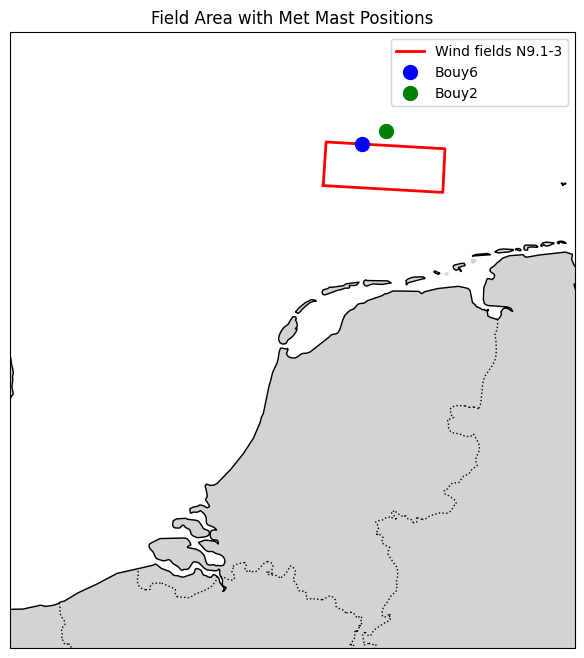

In [37]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the extent of the field and the surrounding area
field_extent = [5.10, 6.50, 54.10, 54.40]  # [min_lon, max_lon, min_lat, max_lat]
surrounding_extent = [2, 8, 51, 55]  # Larger area to encompass Netherlands, Germany, etc.


# Met mast positions
met_mast1_lon, met_mast1_lat = 5.521, 54.4 #Bouy6
met_mast2_lon, met_mast2_lat = 5.792, 54.5 #Bouy2

# Create a figure and axes
proj1=ccrs.LambertConformal(central_longitude=10.0, central_latitude=51, standard_parallels=(48, 54)) 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=proj1)
ax.set_extent(surrounding_extent, crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgray')

# Plot the square representing the farm field and the met masts 
min_lon, max_lon, min_lat, max_lat = field_extent
ax.plot([min_lon, max_lon, max_lon, min_lon, min_lon], 
        [min_lat, min_lat, max_lat, max_lat, min_lat], 
        color='red', linewidth=2, transform=ccrs.PlateCarree(), label='Wind fields N9.1-3')

ax.plot(met_mast1_lon, met_mast1_lat, 'bo', markersize=10, transform=ccrs.PlateCarree(), label='Bouy6')
ax.plot(met_mast2_lon, met_mast2_lat, 'go', markersize=10, transform=ccrs.PlateCarree(), label='Bouy2')
ax.legend()
ax.set_title('Field Area with Met Mast Positions')
plt.show()
